## ------------------------ Token Embeddings-----------------------

- We can get this pretrained embeddings in a number of ways:

  
    1. spacy language models
    2. gensim google tokens
    
- We can also train a model according to our context using gensim 

- For more information melvyn go to our NLP Beginner notes

## 1. Pre-trained Token Embeddings

## Using Google pretrained vector embeddings - word2vec

In [4]:
# Loading pretrained google token embedding - 300 features

import gensim.downloader as api

model = api.load("word2vec-google-news-300")
model

In [5]:
# Checking example vectors for words

model["computer"][:30], model["computer"].shape

(array([ 0.10742188, -0.20117188,  0.12304688,  0.21191406, -0.09130859,
         0.21679688, -0.13183594,  0.08300781,  0.20214844,  0.04785156,
         0.03662109, -0.02453613,  0.02392578, -0.16015625, -0.02612305,
         0.09716797, -0.06347656,  0.18457031,  0.17089844, -0.16308594,
        -0.109375  ,  0.14941406, -0.00046539,  0.09619141,  0.16894531,
         0.00260925,  0.08935547,  0.06494141,  0.03564453, -0.06933594],
       dtype=float32),
 (300,))

In [6]:
dir(model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key'

## Checking for semantic meaning

In [7]:
# Similarity
# King + man - woman

model.most_similar(positive = ["king", "man"], negative = ["woman"], topn=10)

[('kings', 0.6490575075149536),
 ('clown_prince', 0.5009064674377441),
 ('prince', 0.4854173958301544),
 ('crown_prince', 0.48162946105003357),
 ('King', 0.4721396267414093),
 ('ruler', 0.4700629413127899),
 ('sultan', 0.46399128437042236),
 ('undisputed_king', 0.4632039964199066),
 ('princes', 0.4552575349807739),
 ('monarch', 0.45388489961624146)]

In [10]:
# Checking for similarity between two words

model.similarity("man", "banana"), model.similarity("man", "woman")

(0.10060113, 0.76640123)

## Magnitude

In [12]:
# When words have a very different semantic meaning the difference is higher
import numpy as np

word1 = "man"
word2 = "woman"
difference_1 = np.linalg.norm(model[word1] - model[word2])
word3 = "semiconductor"
word4 = "earthworm"
difference_2 = np.linalg.norm(model[word3] - model[word4])
difference_1, difference_2

(1.727951, 5.6670427)

## Cosine similarity

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([model["man"]], [model["woman"]])

array([[0.76640135]], dtype=float32)

## Creating Token Embeddings

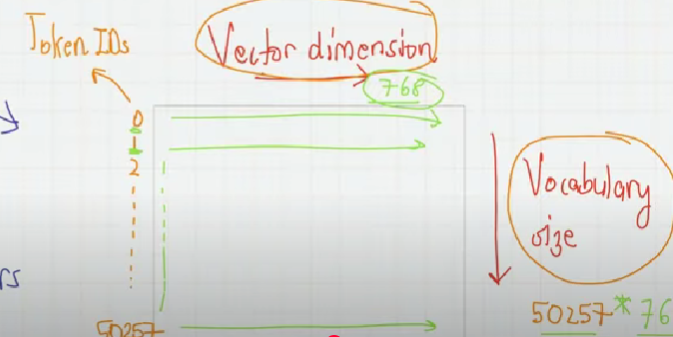

In [30]:
# Lets use an example to see how this token embeddings are created

sample_ids = torch.tensor([2, 3, 5, 1])
sample_ids.ndim, sample_ids

(1, tensor([2, 3, 5, 1]))

- For the sake if simplicity we will use a small vocabulary of 6 words instead of the 505227 in the BPE tokenizer
- The output dim will be 3 meaning 3 features - 3 Dimensions - as the embbedding

In [31]:
# Creating the embedding layer

# Number of words to be created into embeddings
vocab_size = 6
# The features of each word
output_dim = 3
torch.manual_seed(42)
# Initialization - weights will be random which we will optimize
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [32]:
# Printing the embedding layer weights - initialized we are going to tune the parameters
print(embedding_layer.weight)

Parameter containing:
tensor([[ 1.9269,  1.4873, -0.4974],
        [ 0.4396, -0.7581,  1.0783],
        [ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [-0.2316,  0.0418, -0.2516],
        [ 0.8599, -0.3097, -0.3957]], requires_grad=True)


In [33]:
# Checking the dimensions of our embedding

embedding_layer.weight.shape, embedding_layer.weight.ndim

(torch.Size([6, 3]), 2)

- Each word has a vector(array) with 3 elements as the weights for the 3 features

In [34]:
for i, k in enumerate(embedding_layer.weight):
    print(f"word {i+1}", k,"elements = ", k.shape[0])

word 1 tensor([ 1.9269,  1.4873, -0.4974], grad_fn=<UnbindBackward0>) elements =  3
word 2 tensor([ 0.4396, -0.7581,  1.0783], grad_fn=<UnbindBackward0>) elements =  3
word 3 tensor([0.8008, 1.6806, 0.3559], grad_fn=<UnbindBackward0>) elements =  3
word 4 tensor([-0.6866,  0.6105,  1.3347], grad_fn=<UnbindBackward0>) elements =  3
word 5 tensor([-0.2316,  0.0418, -0.2516], grad_fn=<UnbindBackward0>) elements =  3
word 6 tensor([ 0.8599, -0.3097, -0.3957], grad_fn=<UnbindBackward0>) elements =  3


In [35]:
embedding_layer.weight[torch.tensor([3])]

tensor([[-0.6866,  0.6105,  1.3347]], grad_fn=<IndexBackward0>)

In [37]:
sample_ids

tensor([2, 3, 5, 1])

In [36]:
# Checking the embedding for our earlier sample input ids
embedding_layer.weight[sample_ids]

tensor([[ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [ 0.8599, -0.3097, -0.3957],
        [ 0.4396, -0.7581,  1.0783]], grad_fn=<IndexBackward0>)

- Note embedding layer is a lookup matrix
- We pass the token(s) ids to get the vectors
- **Embedding-layer** - This is a simple lookup operation that retrieves rows from the embedding layer weight matrix using a token-id


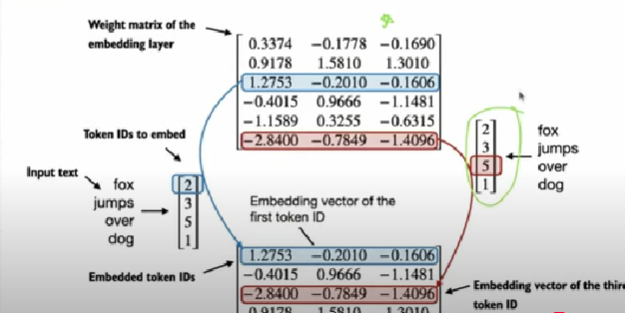